### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [42]:
# loading dataset
data = pd.read_csv("hepatitis_csv.csv")

In [3]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
age                155 non-null int64
sex                155 non-null object
steroid            154 non-null object
antivirals         155 non-null bool
fatigue            154 non-null object
malaise            154 non-null object
anorexia           154 non-null object
liver_big          145 non-null object
liver_firm         144 non-null object
spleen_palpable    150 non-null object
spiders            150 non-null object
ascites            150 non-null object
varices            150 non-null object
bilirubin          149 non-null float64
alk_phosphate      126 non-null float64
sgot               151 non-null float64
albumin            139 non-null float64
protime            88 non-null float64
histology          155 non-null bool
class              155 non-null object
dtypes: bool(2), float64(5), int64(1), object(12)
memory usage: 22.2+ KB


In [8]:
# Data sets contains 155 Rows and 20 columns
print(data.shape) 

(155, 20)


In [9]:
print(data.columns)

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')


In [10]:
data.describe(include='all') # describing 

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
count,155.000000,155,154,155,154,154,154,145,144,150,150,150,150,149.000000,126.000000,151.00000,139.000000,88.000000,155,155
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,female,True,False,True,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,live
freq,NaN,139,78,131,100,93,122,120,84,120,99,130,132,NaN,NaN,NaN,NaN,NaN,85,123
mean,41.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427517,105.325397,85.89404,3.817266,61.852273,NaN,NaN
std,12.565878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.212149,51.508109,89.65089,0.651523,22.875244,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,26.000000,14.00000,2.100000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,74.250000,31.50000,3.400000,46.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,85.000000,58.00000,4.000000,61.000000,NaN,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,132.250000,100.50000,4.200000,76.250000,NaN,NaN


In [11]:
data['class'].describe()

count      155
unique       2
top       live
freq       123
Name: class, dtype: object

In [12]:
data['class'].value_counts(normalize=True)

live    0.793548
die     0.206452
Name: class, dtype: float64

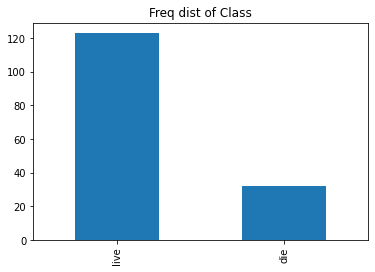

In [13]:
data['class'].value_counts().plot.bar(title='Freq dist of Class')

#### Handling Null Values

In [14]:
data.isnull().values.any()

True

In [15]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [16]:
data.fillna(0, inplace=True)

#### Visualising outliers

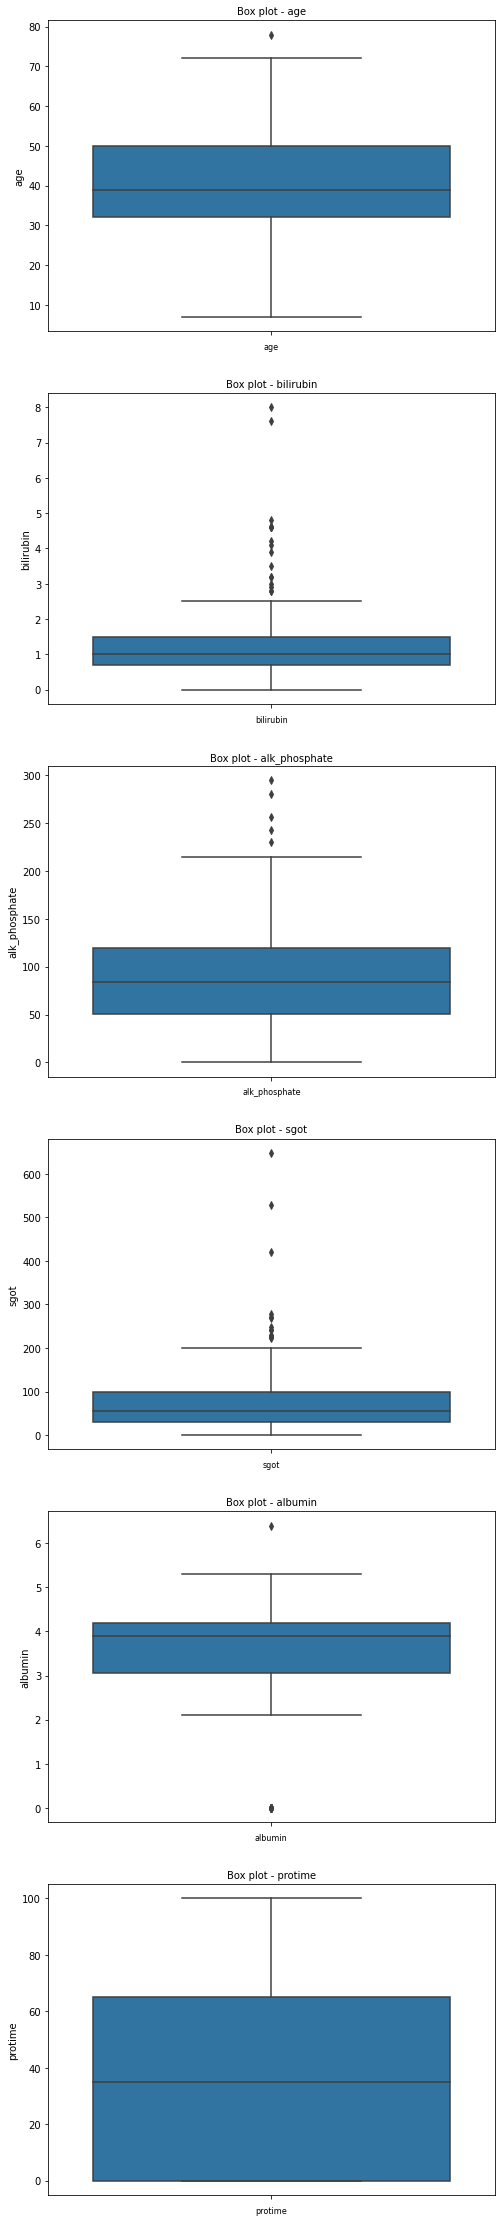

In [17]:
col_names = ["age","bilirubin","alk_phosphate","sgot","albumin","protime"] # numeric columns 

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

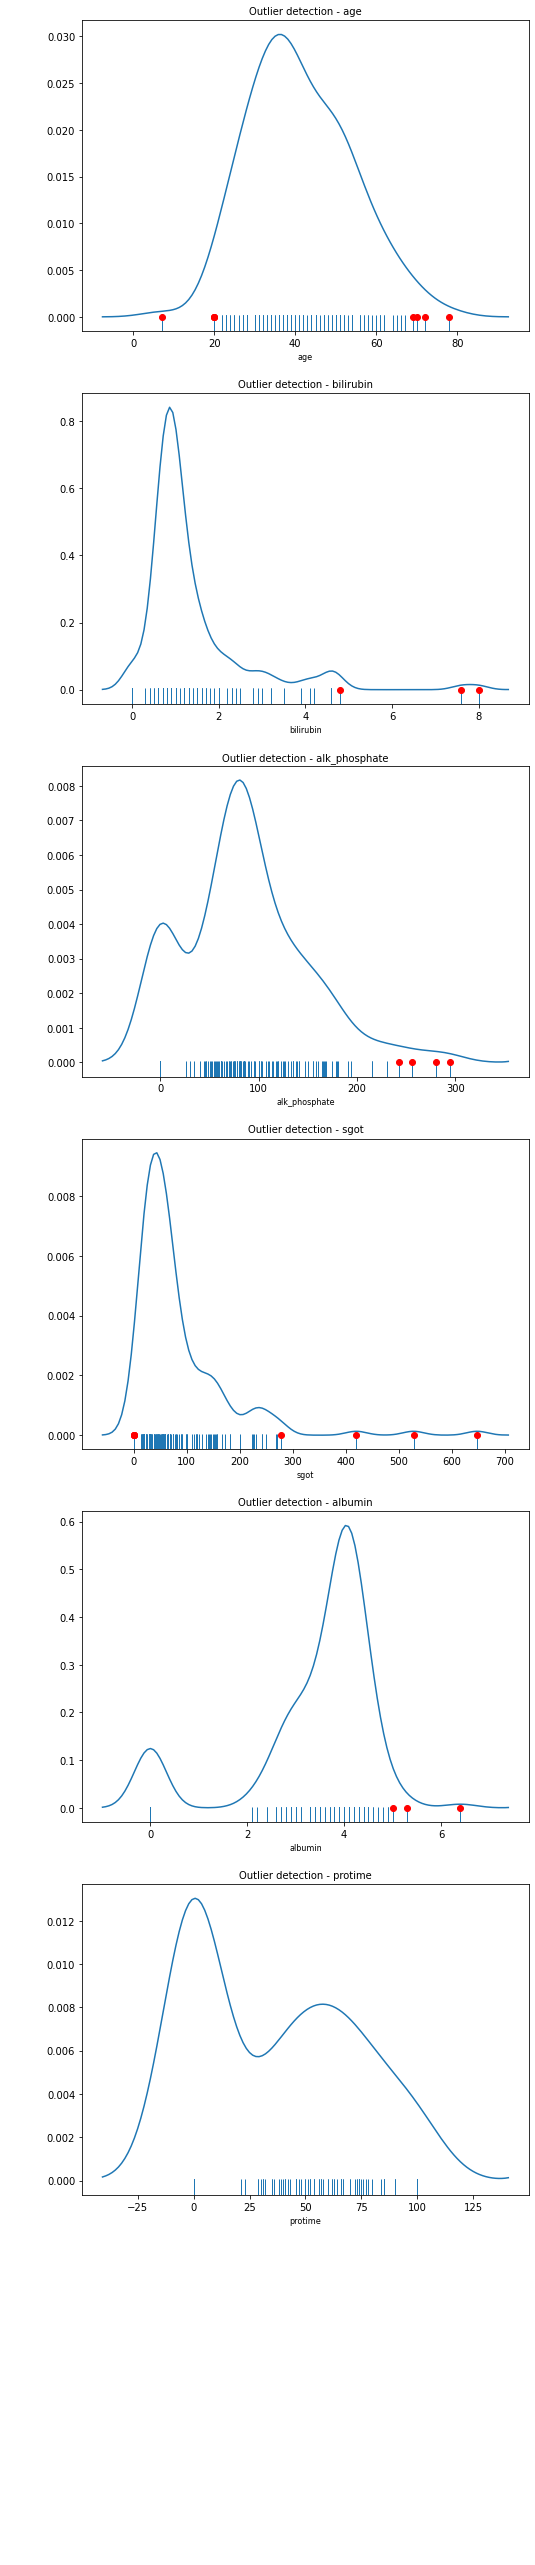

In [18]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ["age","bilirubin","alk_phosphate","sgot","albumin","protime"]

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = data[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#### Handling Categorical Variable

In [20]:
# Categorical boolean 
categorical_feature = data.dtypes==object
# filter categorical columns  and turn it into a list
categorical_cols = data.columns[categorical_feature].tolist()

In [21]:
# instantiate labelencoder object
le = LabelEncoder()

In [22]:
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head()

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,class
0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1


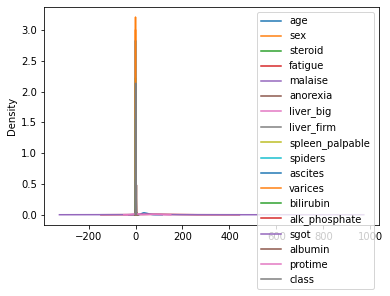

In [24]:
data.plot.kde()  # ploting Kernel Density Estimate plot

#### Correlation Matrix of dataset

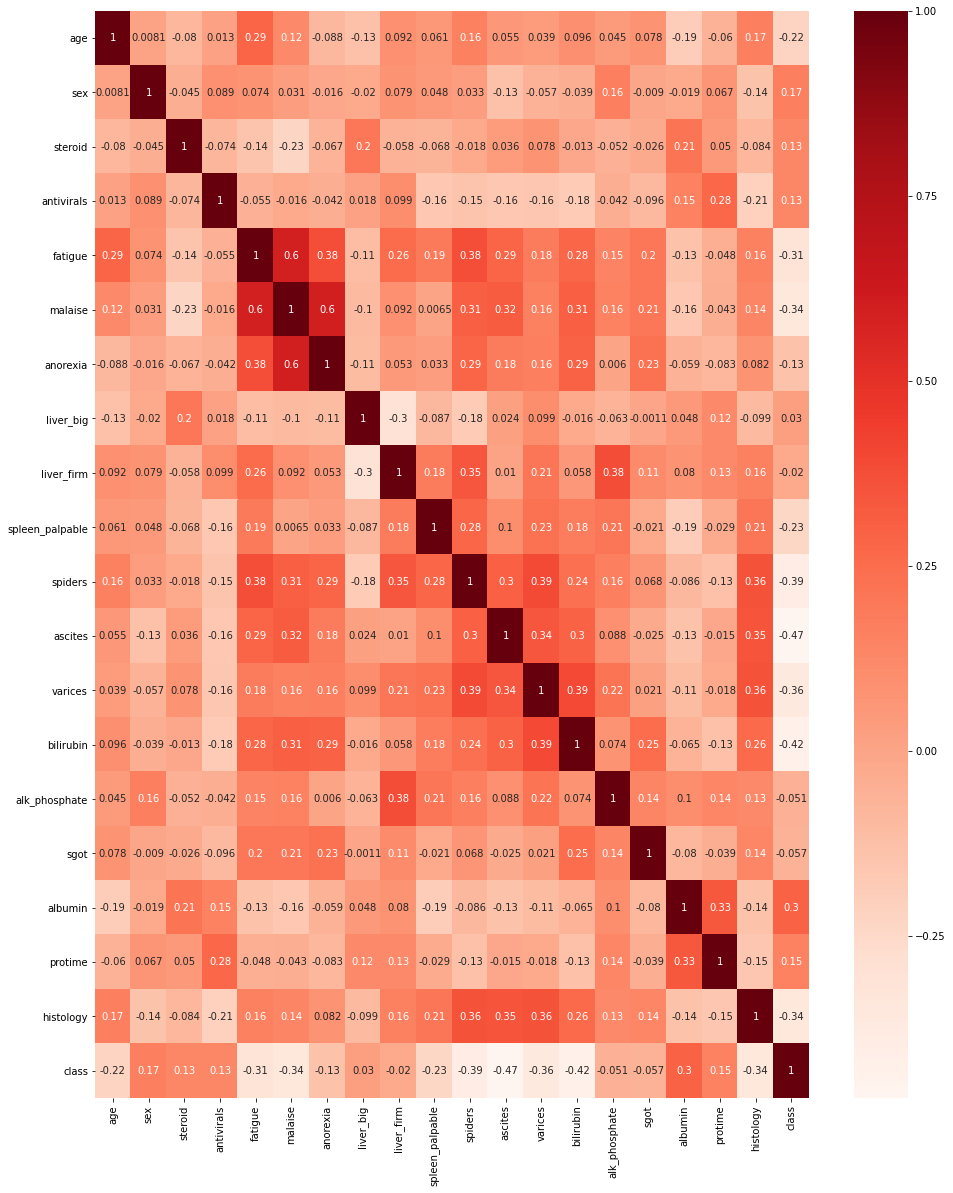

In [25]:
# ["sex","steroid","fatigue","malaise","anorexia","liver_big","liver_firm","spleen_palpable","spiders","ascites","varices"]
f, ax = plt.subplots(figsize=(16, 20))
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True, cmap = 'Reds')

#### Visualising some Important columns 

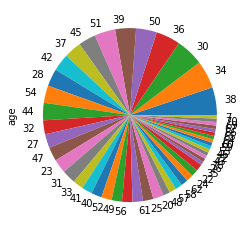

In [27]:
#plot the pie chart of education categories
data.age.value_counts(normalize=True).plot.pie()
plt.show()

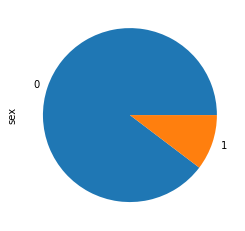

In [28]:
#plot the pie chart of education categories
data.sex.value_counts(normalize=True).plot.pie()
plt.show()

In [29]:
col=["steroid","antivirals","fatigue","malaise","anorexia","liver_big","liver_firm","spleen_palpable","spiders","ascites","varices","bilirubin","alk_phosphate","sgot","albumin","protime","histology","class"]

In [30]:
data[col].describe()

,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.503226,0.645161,0.393548,0.206452,0.774194,0.387097,0.193548,0.329032,0.129032,0.116129,1.372258,85.619355,83.677419,3.423226,35.116129,0.793548
std,0.501610,0.480015,0.490120,0.406070,0.419468,0.488665,0.396360,0.471385,0.336322,0.321418,1.219992,62.061686,89.527688,1.318343,35.221923,0.406070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.500000,119.500000,99.000000,4.200000,65.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,295.000000,648.000000,6.400000,100.000000,1.000000


In [31]:
data[col].shape

(155, 18)

In [32]:
col = ["age","bilirubin","alk_phosphate","sgot","albumin","protime"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D466FB9788>,
      dtype=object)

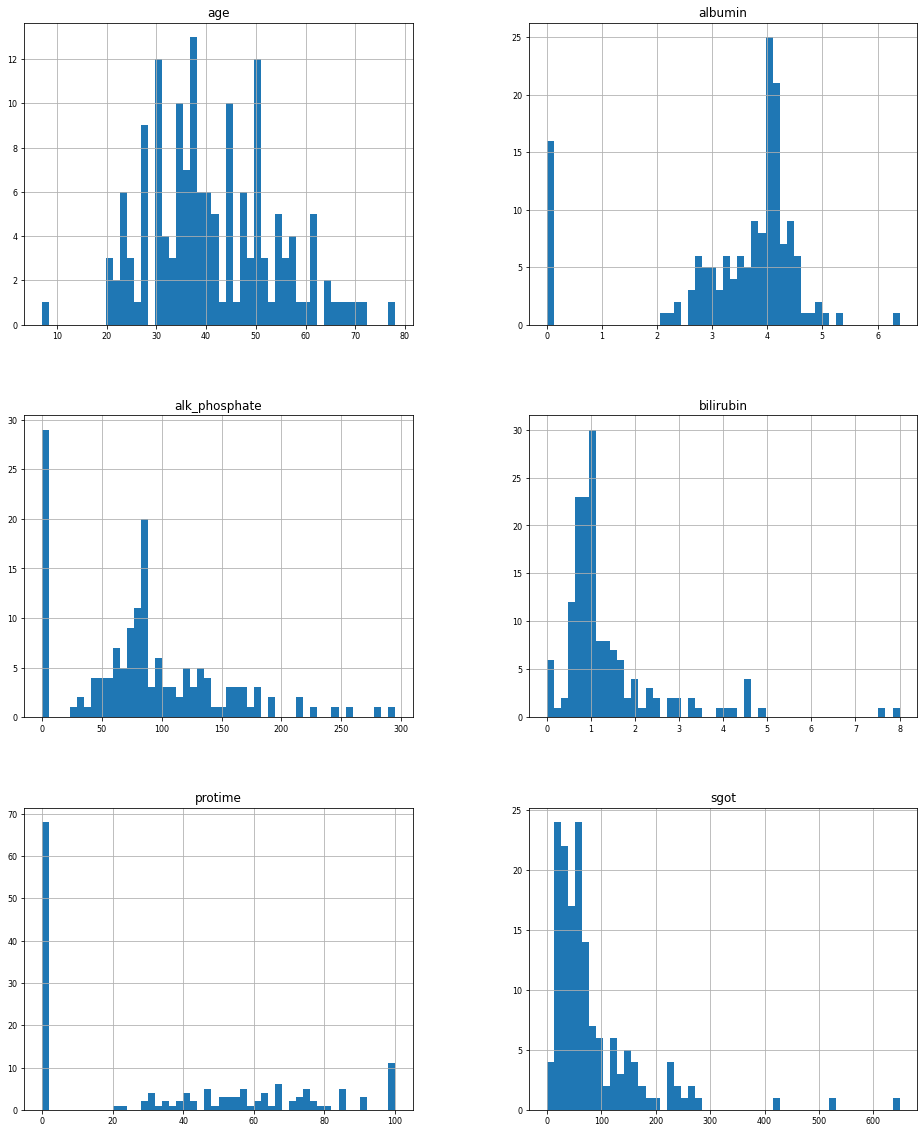

In [33]:
data[col].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

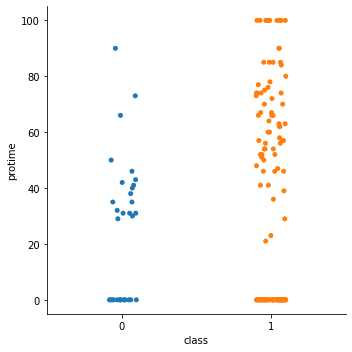

In [34]:
sns.catplot(x="class", y="protime",  data=data)

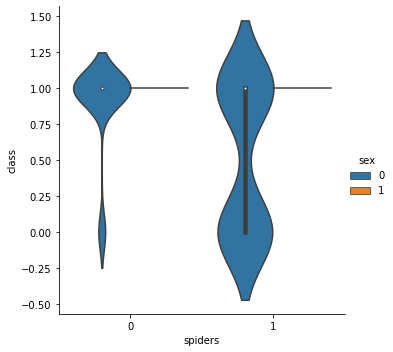

In [35]:
sns.catplot(x="spiders", y="class", hue="sex",
            kind="violin", data=data)

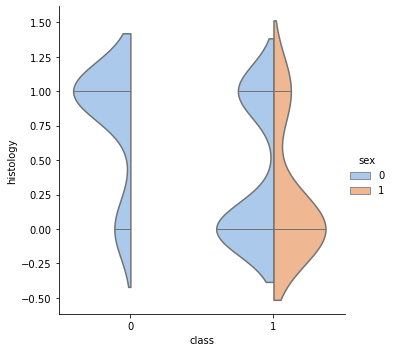

In [36]:
sns.catplot(x="class", y="histology", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=data)

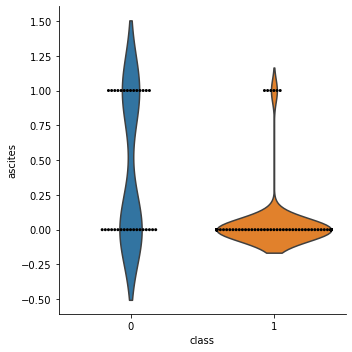

In [37]:
g = sns.catplot(x="class", y="ascites", kind="violin", inner=None, data=data)
sns.swarmplot(x="class", y="ascites", color="k", size=3, data=data, ax=g.ax)

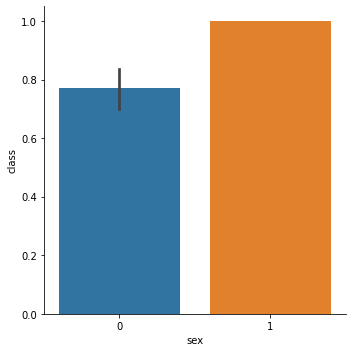

In [38]:
# titanic = sns.load_dataset("data")
sns.catplot(x="sex", y="class", kind="bar", data=data)

In [54]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

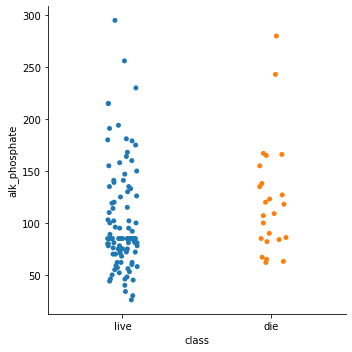

In [59]:
sns.catplot(x='class', y='alk_phosphate',  data=data)

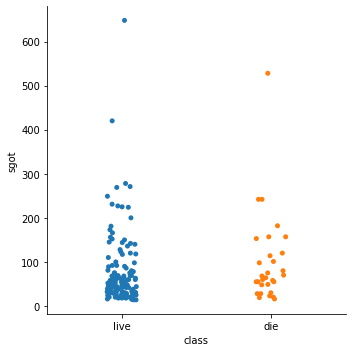

In [60]:
sns.catplot(x='class', y='sgot',  data=data)

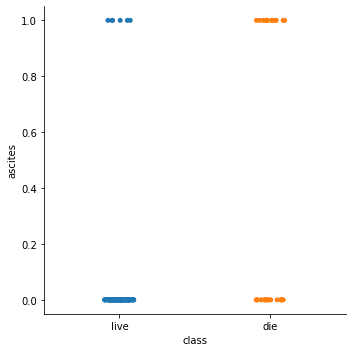

In [61]:
sns.catplot(x='class', y='ascites',  data=data)

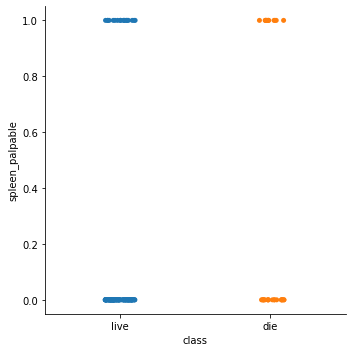

In [62]:
sns.catplot(x='class', y='spleen_palpable',  data=data)

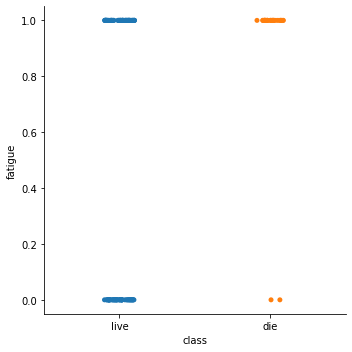

In [63]:
sns.catplot(x='class', y='fatigue',  data=data)